In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense ,BatchNormalization ,GlobalAveragePooling2D,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gunavenkatdoddi/eye-diseases-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'eye-diseases-classification' dataset.
Path to dataset files: /kaggle/input/eye-diseases-classification


In [ ]:
base_folder_path = "/kaggle/input/eye-diseases-classification/dataset"
folders = os.listdir(base_folder_path)
images_paths = []
labels = []
for fold in folders:
    folder_path = os.path.join(base_folder_path, fold)
    file_paths = os.listdir(folder_path)
    for path in file_paths:
        image_path = os.path.join(folder_path, path)
        images_paths.append(image_path)
        labels.append(fold)

In [ ]:
df = pd.DataFrame(data = {"Image Path":images_paths,"Label":labels})
df

,Image Path,Label
0,/kaggle/input/eye-diseases-classification/data...,glaucoma
1,/kaggle/input/eye-diseases-classification/data...,glaucoma
2,/kaggle/input/eye-diseases-classification/data...,glaucoma
3,/kaggle/input/eye-diseases-classification/data...,glaucoma
4,/kaggle/input/eye-diseases-classification/data...,glaucoma
...,...,...
4212,/kaggle/input/eye-diseases-classification/data...,cataract
4213,/kaggle/input/eye-diseases-classification/data...,cataract
4214,/kaggle/input/eye-diseases-classification/data...,cataract
4215,/kaggle/input/eye-diseases-classification/data...,cataract


In [ ]:
train_df , dumy_df = train_test_split(df,test_size=0.2,random_state=42,stratify=df["Label"])
test_df , Valid_df = train_test_split(dumy_df,test_size=0.5,random_state=42,stratify=dumy_df["Label"])

In [ ]:
gen_tr=ImageDataGenerator(rotation_range=45,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True, fill_mode='nearest', shear_range=0.2)
train_gen=gen_tr.flow_from_dataframe(train_df,x_col="Image Path",y_col="Label",target_size=(224,224)
,color_mode="rgb",class_mode="categorical",patch_size=32, shuffle=True,seed=4)

gen=ImageDataGenerator()

test_gen=gen.flow_from_dataframe(test_df,x_col="Image Path",y_col="Label",
target_size=(224,224),color_mode="rgb",class_mode="categorical",patch_size=8,shuffle=False)

valid_gen=gen.flow_from_dataframe(Valid_df,x_col="Image Path",y_col="Label",target_size=(224,224),
color_mode="rgb",class_mode="categorical",patch_size=8, shuffle=False)

Found 3373 validated image filenames belonging to 4 classes.
Found 422 validated image filenames belonging to 4 classes.
Found 422 validated image filenames belonging to 4 classes.


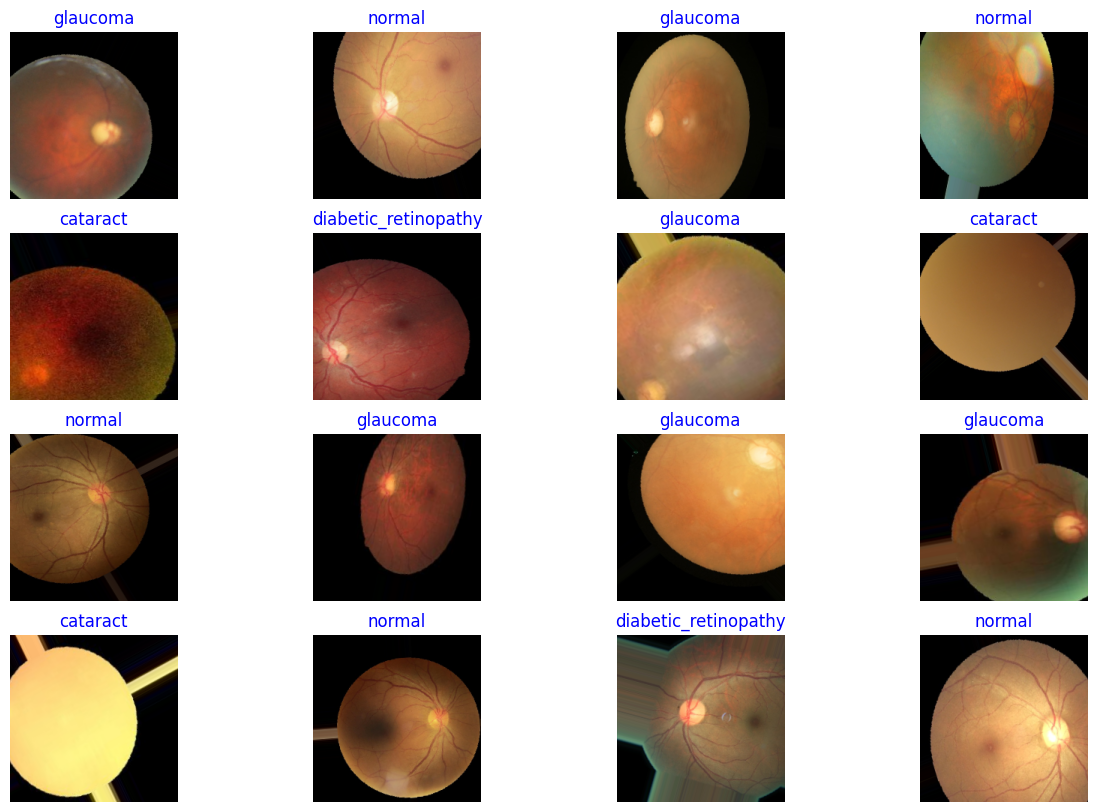

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (15, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image =  images[i]/ 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')

plt.show()

In [ ]:
model= Sequential([
    Conv2D(16,(3,3),activation="relu",input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(32,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(128,(3,3),activation="relu"),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,

    patience=7,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
history=model.fit(train_gen,epochs=100,validation_data=valid_gen,callbacks=[early_stop, reduce_lr],verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 93s 758ms/step - accuracy: 0.4114 - loss: 1.4822 - val_accuracy: 0.4289 - val_loss: 1.2475 - learning_rate: 0.0010
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 59s 557ms/step - accuracy: 0.5343 - loss: 1.1276 - val_accuracy: 0.4147 - val_loss: 1.2393 - learning_rate: 0.0010
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 59s 551ms/step - accuracy: 0.6031 - loss: 0.9843 - val_accuracy: 0.3246 - val_loss: 1.9900 - learning_rate: 0.0010
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 58s 547ms/step - accuracy: 0.6137 - loss: 0.9340 - val_accuracy: 0.3768 - val_loss: 1.8776 - learning_rate: 0.0010
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 59s 553ms/step - accuracy: 0.6442 - loss: 0.8616 - val_accuracy: 0.3602 - val_loss: 2.2390 - learning_rate: 0.0010
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 59s 555ms/step - accuracy: 0.6485 - loss: 0.8557 - val_accuracy: 0.4408 - val_loss: 1.8414 - learning_rate: 0.0010
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 59s 558ms/step - accura

In [ ]:
y_true = test_gen.classes
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step


In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_gen.class_indices.keys())))

Classification Report:
                      precision    recall  f1-score   support

            cataract       0.60      0.97      0.74       104
diabetic_retinopathy       0.84      0.84      0.84       110
            glaucoma       0.90      0.28      0.43       100
              normal       0.71      0.74      0.72       108

            accuracy                           0.71       422
           macro avg       0.76      0.71      0.68       422
        weighted avg       0.76      0.71      0.69       422



In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3, preprocess_input
from tensorflow.keras.models import Model

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='Image Path',
    y_col='Label',
    target_size=(300,300),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

valid_gen = valid_datagen.flow_from_dataframe(
    Valid_df,
    x_col='Image Path',
    y_col='Label',
    target_size=(300,300),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)
test_gen = test_datagen.flow_from_dataframe(
    test_df,
    x_col='Image Path',
    y_col='Label',
    target_size=(300,300),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 3373 validated image filenames belonging to 4 classes.
Found 422 validated image filenames belonging to 4 classes.
Found 422 validated image filenames belonging to 4 classes.


In [ ]:
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=outputs)

In [ ]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)
]

In [ ]:
history2 = model2.fit(
    train_gen,
    epochs=55,
    validation_data=valid_gen,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/55
211/211 ━━━━━━━━━━━━━━━━━━━━ 210s 783ms/step - accuracy: 0.5830 - loss: 0.9831 - val_accuracy: 0.7441 - val_loss: 0.6518 - learning_rate: 0.0010
Epoch 2/55
211/211 ━━━━━━━━━━━━━━━━━━━━ 91s 429ms/step - accuracy: 0.7531 - loss: 0.6186 - val_accuracy: 0.7773 - val_loss: 0.5967 - learning_rate: 0.0010
Epoch 3/55
211/211 ━━━━━━━━━━━━━━━━━━━━ 90s 428ms/step - accuracy: 0.7916 - loss: 0.5328 - val_accuracy: 0.7796 - val_loss: 0.5747 - learning_rate: 0.0010
Epoch 4/55
211/211 ━━━━━━━━━━━━━━━━━━━━ 91s 430ms/step - accuracy: 0.8084 - loss: 0.4973 - val_accuracy: 0.7630 - val_loss: 0.6156 - learning_rate: 0.0010
Epoch 5/55
211/211 ━━━━━━━━━━━━━━━━━━━━ 91s 429ms/step - accuracy: 0.8088 - loss: 0.4704 - val_accuracy: 0.7701 - val_loss: 0.6085 - learning_rate: 0.0010
Epoch 6/55
211/211 ━━━━━━━━━━━━━━━━━━━━ 92s 437ms/step - accuracy: 0.8130 - loss: 0.4822 - val_accuracy: 0.7867 - val_loss: 0.5633 - learning_rate: 0.0010
Epoch 7/55
211/211 ━━━━━━━━━━━━━━━━━━━━ 92s 435ms/step - accuracy: 0.

In [ ]:
y_true = test_gen.classes
y_pred = model2.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 590ms/step


In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_gen.class_indices.keys())))

Classification Report:
                      precision    recall  f1-score   support

            cataract       0.89      0.88      0.89       104
diabetic_retinopathy       0.78      0.85      0.81       110
            glaucoma       0.88      0.57      0.69       100
              normal       0.69      0.85      0.76       108

            accuracy                           0.79       422
           macro avg       0.81      0.79      0.79       422
        weighted avg       0.81      0.79      0.79       422

